In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Cavendish Experiment

At the end of the 19th century, English physicist Henry Cavendish performed an experiment using a torsion pendulum to measure the force of gravity between two masses. Results from Cavendish's experiment yielded a value for the gravitational constant that is very close to the accepted value today. Now, we will embark on the same endeavor using a similar experimental setup.

We performed the Cavendish experiment as outlined in Method II (p. 13-14) of the Pasco Lab Manual. To take our data, we used the timelapse feature of an iPhone 13 Pro camera to record the motion of the laser light against the blackboard. We then used Wolfram Mathematica to extract the position and time coordinates of the laser beam and to convert the pixel length scale to meters. Ultimately, we seek to use this data to derive the value of "big G" in Netwon's universal law of gravitation.

In the Pasco Lab Manual, it is derived that

$$
G = \pi^2 \Delta S b^2 \frac{d^2+\frac{2}{5}r^2}{T^2m_1Ld},
$$

where $r = 9.55\text{mm}, d = 50\text{mm}, b = 46.5\text{mm}$, and $m_1 = 1.5 \text{kg}$ are all contants given in the manual related to the apparatus setup. We measured $L = 8.802 \pm 0.0005 \text{m}$. Thus, from our data, we seek to extract values for $\Delta S$ (the difference in the two oscillator equililbria for position 1 and 2) and $T$ (the period of the oscillation).

Looking ahead, we will correct the above expression for G to account for systematic error. Letting $G_0$ be the corrected value,

$$
G_0 = \frac{G}{1-b}.
$$

### Outline of this Report

We performed 4 experimental runs total. In the first section, I will walk through my entire process of fitting one dataset. In the next section, I will repeat the same procedure but with less commentary for all of my datasets. Finally, I will conclude with a discussion of the results.

### *I. Detailed Commentary on a Single Dataset*

### 1. Importing Data

Below, I import the data containing information on the laser's position versus time. The left data column contains time (in seconds), and the right data column gives the laser's x-position (in meters). The data was extracted from our run recordings using Mathematica.

For this plot, I am also showing error bars for each data point. In the video we took, each horizontal pixel corresponds to 0.00174625 m, so the uncertainty in our data is half of this ($\pm$ 0.000873125 m). However, the uncertainty in each measurement is smaller than the size of the marker on the plot itself, so I leave off the error bars in future plots.

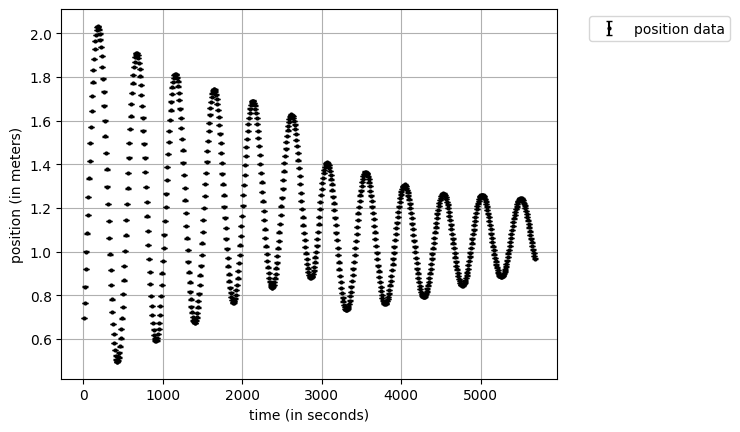

In [22]:
### importing below

# setup
dirpath = '/Users/asudler/Desktop/OU/coursework/2023/fall/PHYS-3302-ALAB1/cavendish/data-mathematica/runs/run1/'
filename = 'laser_pos_v_time_run1.csv'

# import
time, pos = np.genfromtxt(
    dirpath + filename, delimiter=',', unpack=True
)

### plotting below

# plotting
plt.errorbar(
    time, pos,
    marker='o',
    markersize=2,
    capsize=2,
    linestyle='',
    color='black',
    label='position data',
    yerr=0.000873125
)

# labelling
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

### 2a. Fitting the Data: 1st half

The torsion pendulum will exert a restoring force to fight against the gravitational force from the weights; thus, in a perfect world, we could model our dynamics with simple harmonic motion, i.e. $\sin{(\omega t + \phi)} + S_i$, where $S_i$ is an offset from our coordinate system choice (it is the difference in $S_1$ and $S_2$ that matters, so a simple shift will not make a difference).

However, in the real world, energy is lost due to friction, so we will also need to include a decaying exponential term. Thus, to model our data, we will use a damped sinusoidal function $f(t) = A e^{-k t} \sin{(\omega t + \phi)} + S_i$, where
* A is the amplitude of oscillation (in meters),
* k is the rate of decay (dimensionless),
* $\omega$ is the angular frequency of the oscillator (in radians per second),
* $\phi$ is a phase offset (dimensionless, dependent on when we begin taking data), and
* $S_i$ is the oscillator equilibrium position (in meters).

We changed the apparatus from equilibrium position 1 to equilibrium position 2 at $t=3025\text{s}$, which corresponds closest to our datapoint with index 379. We need to fit the data for each equilibria separately. I begin with the first half of the data below.

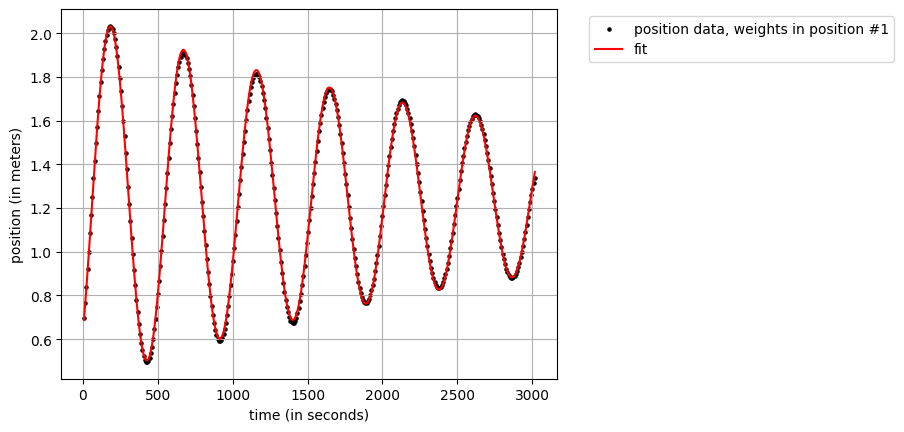

[ 8.37166979e-01  2.97700970e-04  1.28937330e-02 -8.22135994e-01
  1.23903501e+00]
[1.69225802e-03 1.48760192e-06 1.38093650e-06 1.85390152e-03
 4.66539047e-04]


In [23]:
### fitting below

# define fitting model (to be used again in 3a)
def fcn(t, a, k, omega, phi, s):
    return a * np.exp(-k * t) * np.sin(omega * t + phi) + s

# guess to help fit converge properly
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess = np.array([amplitude, k, omega, phi, s])

# do the fit
popt1, pcov1 = curve_fit(fcn, time[:379], pos[:379], p0=guess)

### plotting below

# plotting data
plt.scatter(
    time[:379], pos[:379],
    s=5,
    color='black',
    label='position data, weights in position #1'
)

# plotting fit
plt.plot(
    time[:379], fcn(time[:379], *popt1),
    color='red',
    label='fit'
)

plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

perr1 = np.sqrt(np.diag(pcov1))
print(popt1)
print(perr1)

### 2b. Interpretting Fit Output

The array printed immediately above this markdown cell gives the final parameters for our fit: $A=8.37166979\mathrm{e}{-01}$ (meters), $k=2.97700970\mathrm{e}{-04}$ (dimensionless), $\omega=1.28937330\mathrm{e}{-02}$ (radians per second), $\phi=-8.22135994\mathrm{e}{-01}$ (dimensionless), $S_1=1.23903501\mathrm{e}{+00}$ (meters). The relevant parameters for our purposes are $\omega$ and $S_1$: $T=\frac{2\pi}{\omega} = 487.305$ (in seconds), which should be the same between this fit and the next, and $S_1$ is the equilibrium position for the pendulum in position 1 (in meters).

The second array is the square root of the diagonal elements of the covariance matrix, giving us the standard error in the parameters of our fit. Taking this into account, our fitted parameters (with errors) are:
* $A=8.37166979\mathrm{e}{-01} \pm 1.69225802\mathrm{e}{-03}$ (meters),
* $k=2.97700970\mathrm{e}{-04} \pm 1.48760192\mathrm{e}{-06}$ (dimensionless),
* $\omega=1.28937330\mathrm{e}{-02} \pm 1.38093650\mathrm{e}{-06}$ (radians per second),
* $\phi=-8.22135994\mathrm{e}{-01} \pm 1.85390152\mathrm{e}{-03}$ (dimensionless),
* $S_1=1.23903501\mathrm{e}{+00} \pm 4.66539047\mathrm{e}{-04}$ (meters).

### 3a. Fitting the Data: 2nd half

This part parallels 2a but for the second half of our dataset. Please see above for more information.

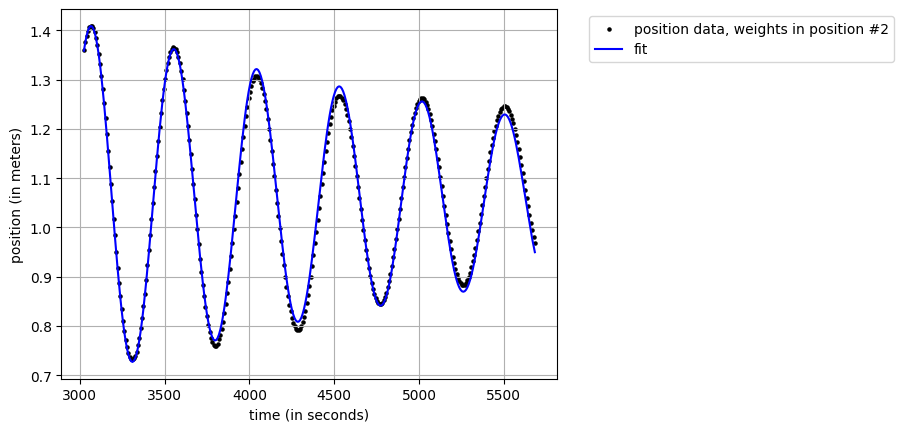

[ 8.61884173e-01  2.91167538e-04  1.28807743e-02 -2.51329405e-01
  1.05584665e+00]
[1.73323960e-02 4.96387090e-06 5.07017061e-06 2.09210074e-02
 6.57827388e-04]


In [24]:
a_guess = 0.35
k_guess = 0.0001
omega_guess = 0.0125
phi_guess = 0
s_guess = 1.05
guess = np.array([a_guess, k_guess, omega_guess, phi_guess, s_guess])

# do the fit
popt2, pcov2 = curve_fit(fcn, time[379:], pos[379:], p0=guess)

### plotting below

plt.scatter(
    time[379:], pos[379:],
    s=5,
    color='black',
    label='position data, weights in position #2'
)

plt.plot(
    time[379:], fcn(time[379:], *popt2),
    color='blue',
    label='fit'
)

plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

perr2 = np.sqrt(np.diag(pcov2))
print(popt2)
print(perr2)

### 3b. Interpretting Fit Output

The array printed immediately above this markdown cell gives the final parameters for our fit: $A=8.61884173\mathrm{e}{-01}$ (meters), $k=2.91167538\mathrm{e}{-04}$ (dimensionless), $\omega=1.28807743\mathrm{e}{-02}$ (radians per second), $\phi=-2.51329405\mathrm{e}{-01}$ (dimensionless), $S_2=1.05584665\mathrm{e}{+00}$ (meters). The relevant parameters for our purposes are $\omega$ and $S_2$: $T=\frac{2\pi}{\omega} \approx 487.796$ (in seconds), which is nearly the same as the previous fit, and $S_2$ is the equilibrium position for the pendulum in position 1 (in meters).

The second array is the square root of the diagonal elements of the covariance matrix, giving us the standard error in the parameters of our fit. Taking this into account, our fitted parameters (with errors) are:
* $A=8.61884173\mathrm{e}{-01} \pm 1.73323960\mathrm{e}{-02}$ (meters),
* $k=2.91167538\mathrm{e}{-04} \pm 4.96387090\mathrm{e}{-06}$ (dimensionless),
* $\omega=1.28807743\mathrm{e}{-02} \pm 5.07017061\mathrm{e}{-06}$ (radians per second),
* $\phi=-2.51329405\mathrm{e}{-01} \pm 2.09210074\mathrm{e}{-02}$ (dimensionless),
* $S_1=1.05584665\mathrm{e}{+00} \pm 6.57827388\mathrm{e}{-04}$ (meters).

### 4. Calculating G

From before,

$$
G = \pi^2 \Delta S b^2 \frac{d^2+\frac{2}{5}r^2}{T^2m_1Ld},
$$

and 

$$
G_0 = \frac{G}{1-b}.
$$

We found $T$, $S_1$, and $S_2$ through our fits. For the period, we will take the average of the two periods from both parts of the fitting procedure, where the standard error is the sum of the two fractional uncertainties of standard errors (Taylor "An Intro to Error Analysis" p. 51). Similarly, we will take the uncertainty in $\Delta S$ to be the sum of the uncertainties in $S_1$ and $S_2$ (Taylor "An Intro to Error Analysis" p. 50). With this in mind, we can calculate the value of G!

In [25]:
### calculating G

# constants from intro
r  = 0.00955 # meter
d  = 0.05    # meter
b  = 0.0464  # meter
m1 = 1.5     # kilogram
l = 8.802    # meter

# fractional uncertainty of m1 (given in lab manual p. 3)
frac_uncert_m1 = 0.01/m1

# fractional uncertainty of our l measurement
frac_uncert_l = 0.0005/l

# values from fit
period = ((2*np.pi/popt1[2]) + (2*np.pi/popt2[2]))*0.5
s1 = popt1[4]
s2 = popt2[4]

# calculate G
G_run1 = (np.pi**2)*(s1 - s2)*(b**2)*((d**2 + (2/5)*(r**2))/((period**2)*m1*l*d))

# calculate G0
G0_run1 = G_run1/(1-b)

### calculate the error in G

# the standard error of \Delta S is the sum of its constituent standard errors
stderr_ds = perr1[4] + perr2[4]

# to propagate error, we need to work with the fractional uncertainty
frac_uncert_ds = (stderr_ds/np.abs(s2 - s1))

# the fractional uncertainty of the average period
# is the sum of each individual fractional uncertainty
# and also, the fractional uncertainty of the period will be the same
# as the fractional uncertainty of the angular frequency
frac_uncert_period = perr1[2]/popt1[2] + perr2[2]/popt2[2]

# the total error in G is
# the fractional uncertainty in the period, x2 (since it is squared in the formula)
# plus the fractional uncertainty in \Delta S
uncert_G = frac_uncert_period*2 + frac_uncert_ds + frac_uncert_l + frac_uncert_m1

# the accepted value of G
# https://pml.nist.gov/
accepted_G = 6.67430e-11

# printing the final output
reportG = f"""
{'-'*42}
|  from our data, we find...
|
|  the value of G:
|  G = {G_run1:.5e} +/- {G_run1*uncert_G:.5e} m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = {G0_run1:.5e} +/- {G0_run1*uncert_G:.5e} m^3/(kg*s)
|
|  this G0 is within {abs(100 - (G0_run1/accepted_G)*100):.5f}% of
|  the presently accepted value of G.
{'-'*42}
"""

print(reportG)



------------------------------------------
|  from our data, we find...
|
|  the value of G:
|  G = 6.29192e-11 +/- 8.72229e-13 m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = 6.59807e-11 +/- 9.14670e-13 m^3/(kg*s)
|
|  this G0 is within 1.14209% of
|  the presently accepted value of G.
------------------------------------------



______

### *II. All 4 Datasets*

Now, I will go through the procedure outlined above for all 4 datasets, sparing the excessive detail and comments I went through previously. Because the error in the position measurement is smaller than the data markers on my plots, I will not plot error bars. The procedure and form of the data is exactly the same as in the previous section.

### 1. First Run

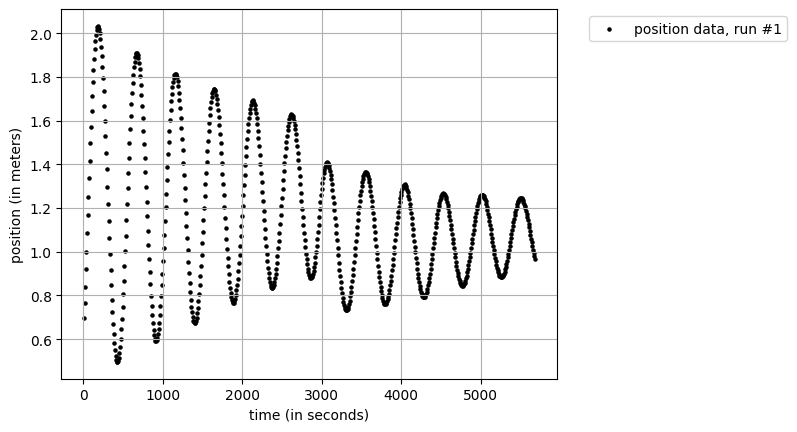

In [26]:
### importing below

# setup
dirpath = '/Users/asudler/Desktop/OU/coursework/2023/fall/PHYS-3302-ALAB1/cavendish/data-mathematica/runs/run1/'
filename = 'laser_pos_v_time_run1.csv'

# import
time, pos = np.genfromtxt(
    dirpath + filename, delimiter=',', unpack=True
)

### plotting below

# plotting
plt.scatter(
    time, pos,
    s=5,
    color='black',
    label='position data, run #1'
)

# labelling
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

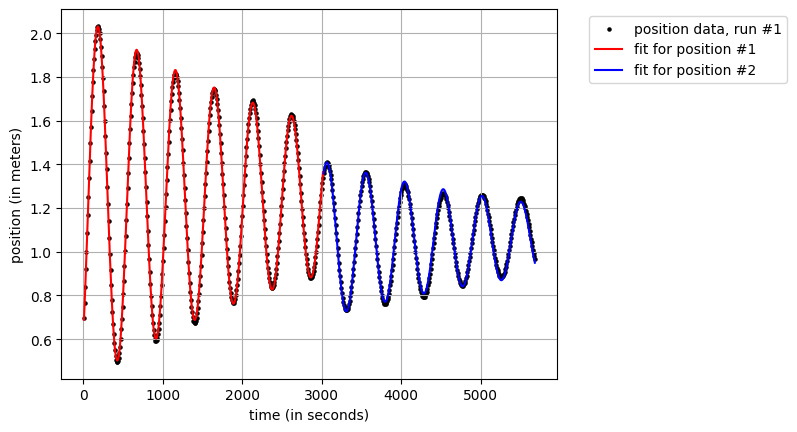


------------------------------------------
|  (for the plot of data for run #1)
------------------------------------------
|  1. the following are the best fit parameters 
|  and their std. errors for the **first**
|  equilibrium position:
|
|  A = 8.37167e-01 +/- 1.692e-03 (meters)
|  k = 2.97701e-04 +/- 1.488e-06 (dimensionless)
|  omega = 1.28937e-02 +/- 1.381e-06 (radians per second)
|  phi = -8.22136e-01 +/- 1.854e-03 (dimensionless)
|  S = 1.23904e+00 +/- 4.665e-04 (meters)
------------------------------------------
|  2. the following are the best fit parameters 
|  and their std. errors for the **second**
|  equilibrium position:
|
|  A = -8.61884e-01 +/- 1.733e-02 (meters)
|  k = 2.91168e-04 +/- 4.964e-06 (dimensionless)
|  omega = 1.28808e-02 +/- 5.070e-06 (radians per second)
|  phi = -3.39292e+00 +/- 2.092e-02 (dimensionless)
|  S = 1.05585e+00 +/- 6.578e-04 (meters)
------------------------------------------



In [27]:
### fitting below

# for this dataset, the positions change at index 379

switch_index = 379

# define fitting model (same as before)
def fcn(t, a, k, omega, phi, s):
    return a * np.exp(-k * t) * np.sin(omega * t + phi) + s

# (first part of data) guess to help fit converge properly
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess = np.array([amplitude, k, omega, phi, s])

# do the fit
popt1a, pcov1a = curve_fit(fcn, time[:switch_index], pos[:switch_index], p0=guess)

# (and again for the second part of the data) guess to help fit converge properly
amplitude = 0.9
k = 0.0005
omega = 0.0125
phi = -2
s = 0.9
guess = np.array([amplitude, k, omega, phi, s])

# do the fit
popt1b, pcov1b = curve_fit(fcn, time[switch_index:], pos[switch_index:], p0=guess)

### plotting below

# plotting data
plt.scatter(
    time, pos,
    s=5,
    color='black',
    label='position data, run #1'
)

# plotting fit for first half of data
plt.plot(
    time[:switch_index], fcn(time[:switch_index], *popt1a),
    color='red',
    label='fit for position #1'
)

# plotting fit for second half of data
plt.plot(
    time[switch_index:], fcn(time[switch_index:], *popt1b),
    color='blue',
    label='fit for position #2'
)

plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

perr1a = np.sqrt(np.diag(pcov1a))
perr1b = np.sqrt(np.diag(pcov1b))

report1 = f"""
{'-'*42}
|  (for the plot of data for run #1)
{'-'*42}
|  1. the following are the best fit parameters 
|  and their std. errors for the **first**
|  equilibrium position:
|
|  A = {popt1a[0]:.5e} +/- {perr1a[0]:.3e} (meters)
|  k = {popt1a[1]:.5e} +/- {perr1a[1]:.3e} (dimensionless)
|  omega = {popt1a[2]:.5e} +/- {perr1a[2]:.3e} (radians per second)
|  phi = {popt1a[3]:.5e} +/- {perr1a[3]:.3e} (dimensionless)
|  S = {popt1a[4]:.5e} +/- {perr1a[4]:.3e} (meters)
{'-'*42}
|  2. the following are the best fit parameters 
|  and their std. errors for the **second**
|  equilibrium position:
|
|  A = {popt1b[0]:.5e} +/- {perr1b[0]:.3e} (meters)
|  k = {popt1b[1]:.5e} +/- {perr1b[1]:.3e} (dimensionless)
|  omega = {popt1b[2]:.5e} +/- {perr1b[2]:.3e} (radians per second)
|  phi = {popt1b[3]:.5e} +/- {perr1b[3]:.3e} (dimensionless)
|  S = {popt1b[4]:.5e} +/- {perr1b[4]:.3e} (meters)
{'-'*42}
"""

print(report1)


In [28]:
### calculating G

# values from fit
period = ((2*np.pi/popt1a[2]) + (2*np.pi/popt1b[2]))*0.5
s1 = popt1a[4]
s2 = popt1b[4]

# calculate G
G_run1 = (np.pi**2)*abs(s1 - s2)*(b**2)*((d**2 + (2/5)*(r**2))/((period**2)*m1*l*d))

# calculate G0
G0_run1 = G_run1/(1-b)

### calculate the error in G

# the standard error of \Delta S is the sum of its constituent standard errors
stderr_ds = perr1a[4] + perr1b[4]

# to propagate error, we need to work with the fractional uncertainty
frac_uncert_ds = (stderr_ds/np.abs(s2 - s1))

# the fractional uncertainty of the average period
# is the sum of each individual fractional uncertainty
# and also, the fractional uncertainty of the period will be the same
# as the fractional uncertainty of the angular frequency
frac_uncert_period = perr1a[2]/popt1a[2] + perr1b[2]/popt1b[2]

# the total error in G is
# the fractional uncertainty in the period, x2 (since it is squared in the formula)
# plus the fractional uncertainty in \Delta S
uncert_G1 = frac_uncert_period*2 + frac_uncert_ds + frac_uncert_l + frac_uncert_m1

# the accepted value of G
# https://pml.nist.gov/
accepted_G = 6.67430e-11

# printing the final output
reportG1 = f"""
{'-'*42}
|  from our run #1 data, we find...
|
|  the value of G:
|  G = {G_run1:.5e} +/- {G_run1*uncert_G1:.5e} m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = {G0_run1:.5e} +/- {G0_run1*uncert_G1:.5e} m^3/(kg*s)
|
|  this G0 is within {abs(100 - (G0_run1/accepted_G)*100):.5f}% of
|  the presently accepted value of G.
{'-'*42}
"""

print(reportG1)


------------------------------------------
|  from our run #1 data, we find...
|
|  the value of G:
|  G = 6.29192e-11 +/- 8.72229e-13 m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = 6.59807e-11 +/- 9.14670e-13 m^3/(kg*s)
|
|  this G0 is within 1.14209% of
|  the presently accepted value of G.
------------------------------------------



### 2. Second Run

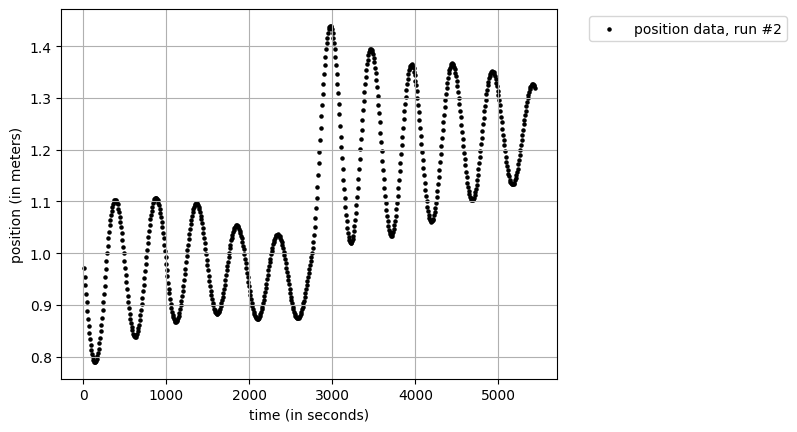

In [29]:
### importing below

# setup
dirpath = '/Users/asudler/Desktop/OU/coursework/2023/fall/PHYS-3302-ALAB1/cavendish/data-mathematica/runs/run2/'
filename = 'laser_pos_v_time_run2.csv'

# import
time, pos = np.genfromtxt(
    dirpath + filename, delimiter=',', unpack=True
)

### plotting below

# plotting
plt.scatter(
    time, pos,
    s=5,
    color='black',
    label='position data, run #2'
)

# labelling
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

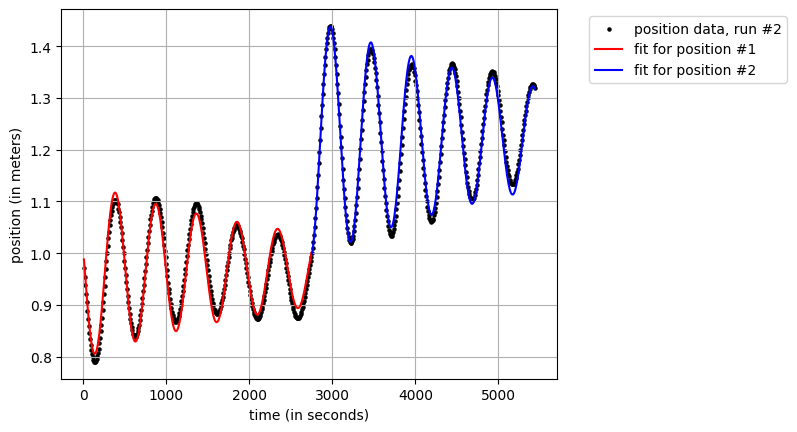


------------------------------------------
|  (for the plot of data for run #2)
------------------------------------------
|  1. the following are the best fit parameters 
|  and their uncertainties for the **first**
|  equilibrium position:
|
|  A = -1.69434e-01 +/- 2.718e-03 (meters)
|  k = 3.21962e-04 +/- 1.299e-05 (dimensionless)
|  omega = 1.28355e-02 +/- 1.237e-05 (radians per second)
|  phi = -2.23399e-01 +/- 1.535e-02 (dimensionless)
|  S = 9.67422e-01 +/- 7.657e-04 (meters)
------------------------------------------
|  2. the following are the best fit parameters 
|  and their uncertainties for the **second**
|  equilibrium position:
|
|  A = 5.49533e-01 +/- 1.622e-02 (meters)
|  k = 3.13140e-04 +/- 7.713e-06 (dimensionless)
|  omega = 1.28801e-02 +/- 7.722e-06 (radians per second)
|  phi = -5.37049e+00 +/- 2.928e-02 (dimensionless)
|  S = 1.22196e+00 +/- 6.404e-04 (meters)
------------------------------------------



In [30]:
### fitting below

# for this dataset, the positions change closest to index 344 (t \approx 46:03 (min:sec))

switch_index = 344

# define fitting model (same as before)
def fcn(t, a, k, omega, phi, s):
    return a * np.exp(-k * t) * np.sin(omega * t + phi) + s

# (first part of data) guess to help fit converge properly
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess = np.array([amplitude, k, omega, phi, s])

# do the fit
popt2a, pcov2a = curve_fit(fcn, time[:switch_index], pos[:switch_index], p0=guess)

# (and again for the second part of the data) guess to help fit converge properly
amplitude = 0.9
k = 0.0005
omega = 0.0125
phi = -2
s = 0.9
guess = np.array([amplitude, k, omega, phi, s])

# do the fit
popt2b, pcov2b = curve_fit(fcn, time[switch_index:], pos[switch_index:], p0=guess)

### plotting below

# plotting data
plt.scatter(
    time, pos,
    s=5,
    color='black',
    label='position data, run #2'
)

# plotting fit for first half of data
plt.plot(
    time[:switch_index], fcn(time[:switch_index], *popt2a),
    color='red',
    label='fit for position #1'
)

# plotting fit for second half of data
plt.plot(
    time[switch_index:], fcn(time[switch_index:], *popt2b),
    color='blue',
    label='fit for position #2'
)

plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

perr2a = np.sqrt(np.diag(pcov2a))
perr2b = np.sqrt(np.diag(pcov2b))

report2 = f"""
{'-'*42}
|  (for the plot of data for run #2)
{'-'*42}
|  1. the following are the best fit parameters 
|  and their uncertainties for the **first**
|  equilibrium position:
|
|  A = {popt2a[0]:.5e} +/- {perr2a[0]:.3e} (meters)
|  k = {popt2a[1]:.5e} +/- {perr2a[1]:.3e} (dimensionless)
|  omega = {popt2a[2]:.5e} +/- {perr2a[2]:.3e} (radians per second)
|  phi = {popt2a[3]:.5e} +/- {perr2a[3]:.3e} (dimensionless)
|  S = {popt2a[4]:.5e} +/- {perr2a[4]:.3e} (meters)
{'-'*42}
|  2. the following are the best fit parameters 
|  and their uncertainties for the **second**
|  equilibrium position:
|
|  A = {popt2b[0]:.5e} +/- {perr2b[0]:.3e} (meters)
|  k = {popt2b[1]:.5e} +/- {perr2b[1]:.3e} (dimensionless)
|  omega = {popt2b[2]:.5e} +/- {perr2b[2]:.3e} (radians per second)
|  phi = {popt2b[3]:.5e} +/- {perr2b[3]:.3e} (dimensionless)
|  S = {popt2b[4]:.5e} +/- {perr2b[4]:.3e} (meters)
{'-'*42}
"""

print(report2)

In [31]:
### calculating G

# values from fit
period = ((2*np.pi/popt2a[2]) + (2*np.pi/popt2b[2]))*0.5
s1 = popt2a[4]
s2 = popt2b[4]

# calculate G
G_run2 = (np.pi**2)*abs(s1 - s2)*(b**2)*((d**2 + (2/5)*(r**2))/((period**2)*m1*l*d))

# calculate G0
G0_run2 = G_run2/(1-b)

### calculate the error in G

# the standard error of \Delta S is the sum of its constituent standard errors
stderr_ds = perr2a[4] + perr2b[4]

# to propagate error, we need to work with the fractional uncertainty
frac_uncert_ds = (stderr_ds/np.abs(s2 - s1))

# the fractional uncertainty of the average period
# is the sum of each individual fractional uncertainty
# and also, the fractional uncertainty of the period will be the same
# as the fractional uncertainty of the angular frequency
frac_uncert_period = perr2a[2]/popt2a[2] + perr2b[2]/popt2b[2]

# the total error in G is
# the fractional uncertainty in the period, x2 (since it is squared in the formula)
# plus the fractional uncertainty in \Delta S
uncert_G2 = frac_uncert_period*2 + frac_uncert_ds + frac_uncert_l + frac_uncert_m1

# the accepted value of G
# https://pml.nist.gov/
accepted_G = 6.67430e-11

# printing the final output
reportG2 = f"""
{'-'*42}
|  from our run #2 data, we find...
|
|  the value of G:
|  G = {G_run2:.5e} +/- {G_run2*uncert_G2:.5e} m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = {G0_run2:.5e} +/- {G0_run2*uncert_G2:.5e} m^3/(kg*s)
|
|  this G0 is within {abs(100 - (G0_run2/accepted_G)*100):.5f}% of
|  the presently accepted value of G.
{'-'*42}
"""

print(reportG2)


------------------------------------------
|  from our run #2 data, we find...
|
|  the value of G:
|  G = 8.70239e-11 +/- 1.33789e-12 m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = 9.12583e-11 +/- 1.40299e-12 m^3/(kg*s)
|
|  this G0 is within 36.73091% of
|  the presently accepted value of G.
------------------------------------------



### 3. Third Run

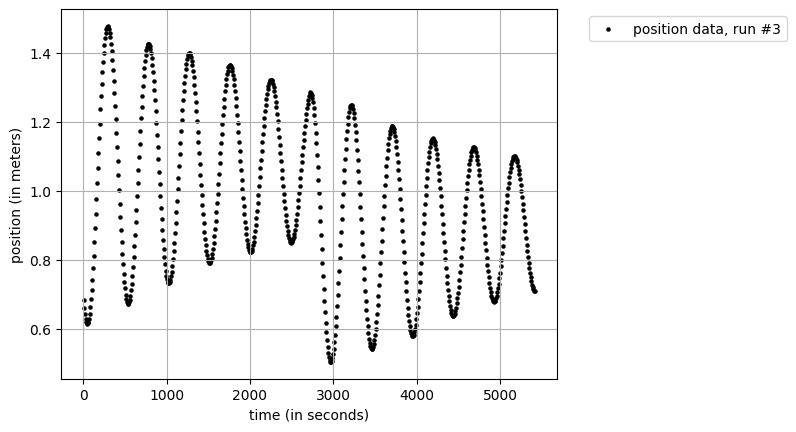

In [32]:
### importing below

# setup
dirpath = '/Users/asudler/Desktop/OU/coursework/2023/fall/PHYS-3302-ALAB1/cavendish/data-mathematica/runs/run3/'
filename = 'laser_pos_v_time_run3.csv'

# import
time, pos = np.genfromtxt(
    dirpath + filename, delimiter=',', unpack=True
)

### plotting below

# plotting
plt.scatter(
    time, pos,
    s=5,
    color='black',
    label='position data, run #3'
)

# labelling
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

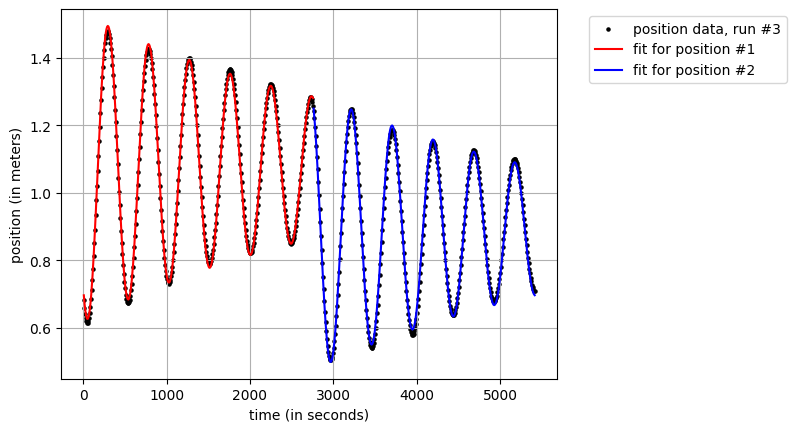


------------------------------------------
|  (for the plot of data for run #3)
------------------------------------------
|  1. the following are the best fit parameters 
|  and their uncertainties for the **first**
|  equilibrium position:
|
|  A = 4.56089e-01 +/- 1.749e-03 (meters)
|  k = 2.81006e-04 +/- 3.014e-06 (dimensionless)
|  omega = 1.28649e-02 +/- 3.219e-06 (radians per second)
|  phi = -2.25958e+00 +/- 4.165e-03 (dimensionless)
|  S = 1.07521e+00 +/- 5.382e-04 (meters)
------------------------------------------
|  2. the following are the best fit parameters 
|  and their uncertainties for the **second**
|  equilibrium position:
|
|  A = 9.19714e-01 +/- 1.137e-02 (meters)
|  k = 2.90611e-04 +/- 3.212e-06 (dimensionless)
|  omega = 1.28147e-02 +/- 3.086e-06 (radians per second)
|  phi = -1.94159e+00 +/- 1.176e-02 (dimensionless)
|  S = 8.86401e-01 +/- 4.757e-04 (meters)
------------------------------------------



In [33]:
### fitting below

# for this dataset, the positions change at index 345 (t \approx 46:04 (min:sec))
# we will fit the first part in this cell

switch_index = 345

# define fitting model (same as before)
def fcn(t, a, k, omega, phi, s):
    return a * np.exp(-k * t) * np.sin(omega * t + phi) + s

# (first part of data) guess to help fit converge properly
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess = np.array([amplitude, k, omega, phi, s])

# do the fit
popt3a, pcov3a = curve_fit(fcn, time[:switch_index], pos[:switch_index], p0=guess)

# (and again for the second part of the data) guess to help fit converge properly
amplitude = 0.9
k = 0.0005
omega = 0.0125
phi = -2
s = 0.9
guess = np.array([amplitude, k, omega, phi, s])

# do the fit
popt3b, pcov3b = curve_fit(fcn, time[switch_index:], pos[switch_index:], p0=guess)

### plotting below

# plotting data
plt.scatter(
    time, pos,
    s=5,
    color='black',
    label='position data, run #3'
)

# plotting fit for first half of data
plt.plot(
    time[:switch_index], fcn(time[:switch_index], *popt3a),
    color='red',
    label='fit for position #1'
)

# plotting fit for second half of data
plt.plot(
    time[switch_index:], fcn(time[switch_index:], *popt3b),
    color='blue',
    label='fit for position #2'
)

plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

perr3a = np.sqrt(np.diag(pcov3a))
perr3b = np.sqrt(np.diag(pcov3b))

report3 = f"""
{'-'*42}
|  (for the plot of data for run #3)
{'-'*42}
|  1. the following are the best fit parameters 
|  and their uncertainties for the **first**
|  equilibrium position:
|
|  A = {popt3a[0]:.5e} +/- {perr3a[0]:.3e} (meters)
|  k = {popt3a[1]:.5e} +/- {perr3a[1]:.3e} (dimensionless)
|  omega = {popt3a[2]:.5e} +/- {perr3a[2]:.3e} (radians per second)
|  phi = {popt3a[3]:.5e} +/- {perr3a[3]:.3e} (dimensionless)
|  S = {popt3a[4]:.5e} +/- {perr3a[4]:.3e} (meters)
{'-'*42}
|  2. the following are the best fit parameters 
|  and their uncertainties for the **second**
|  equilibrium position:
|
|  A = {popt3b[0]:.5e} +/- {perr3b[0]:.3e} (meters)
|  k = {popt3b[1]:.5e} +/- {perr3b[1]:.3e} (dimensionless)
|  omega = {popt3b[2]:.5e} +/- {perr3b[2]:.3e} (radians per second)
|  phi = {popt3b[3]:.5e} +/- {perr3b[3]:.3e} (dimensionless)
|  S = {popt3b[4]:.5e} +/- {perr3b[4]:.3e} (meters)
{'-'*42}
"""

print(report3)


In [34]:
### calculating G

# values from fit
period = ((2*np.pi/popt3a[2]) + (2*np.pi/popt3b[2]))*0.5
s1 = popt3a[4]
s2 = popt3b[4]

# calculate G
G_run3 = (np.pi**2)*abs(s1 - s2)*(b**2)*((d**2 + (2/5)*(r**2))/((period**2)*m1*l*d))

# calculate G0
G0_run3 = G_run3/(1-b)

### calculate the error in G

# the standard error of \Delta S is the sum of its constituent standard errors
stderr_ds = perr3a[4] + perr3b[4]

# to propagate error, we need to work with the fractional uncertainty
frac_uncert_ds = (stderr_ds/np.abs(s2 - s1))

# the fractional uncertainty of the average period
# is the sum of each individual fractional uncertainty
# and also, the fractional uncertainty of the period will be the same
# as the fractional uncertainty of the angular frequency
frac_uncert_period = perr3a[2]/popt3a[2] + perr3b[2]/popt3b[2]

# the total error in G is
# the fractional uncertainty in the period, x2 (since it is squared in the formula)
# plus the fractional uncertainty in \Delta S
uncert_G3 = frac_uncert_period*2 + frac_uncert_ds + frac_uncert_l + frac_uncert_m1

# the accepted value of G
# https://pml.nist.gov/
accepted_G = 6.67430e-11

# printing the final output
reportG3 = f"""
{'-'*42}
|  from our run #3 data, we find...
|
|  the value of G:
|  G = {G_run3:.5e} +/- {G_run3*uncert_G3:.5e} m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = {G0_run3:.5e} +/- {G0_run3*uncert_G3:.5e} m^3/(kg*s)
|
|  this G0 is within {abs(100 - (G0_run3/accepted_G)*100):.5f}% of
|  the presently accepted value of G.
{'-'*42}
"""

print(reportG3)


------------------------------------------
|  from our run #3 data, we find...
|
|  the value of G:
|  G = 6.43731e-11 +/- 8.41707e-13 m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = 6.75054e-11 +/- 8.82662e-13 m^3/(kg*s)
|
|  this G0 is within 1.14227% of
|  the presently accepted value of G.
------------------------------------------



### 4. Fourth Run

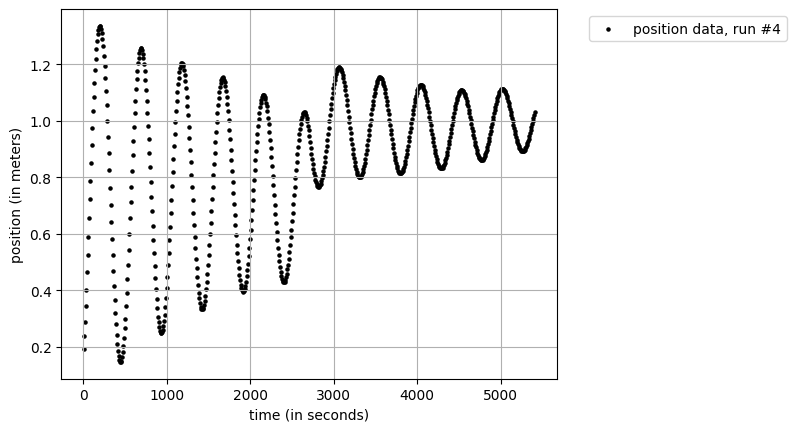

In [35]:
### importing below

# setup
dirpath = '/Users/asudler/Desktop/OU/coursework/2023/fall/PHYS-3302-ALAB1/cavendish/data-mathematica/runs/run4/'
filename = 'laser_pos_v_time_run4.csv'

# import
time, pos = np.genfromtxt(
    dirpath + filename, delimiter=',', unpack=True
)

### plotting below

# plotting
plt.scatter(
    time, pos,
    s=5,
    color='black',
    label='position data, run #4'
)

# labelling
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

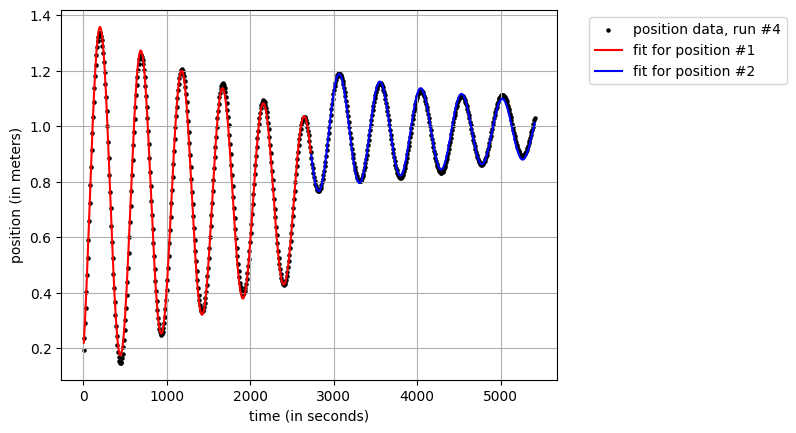


------------------------------------------
|  (for the plot of data for run #4)
------------------------------------------
|  1. the following are the best fit parameters 
|  and their uncertainties for the **first**
|  equilibrium position:
|
|  A = 6.52270e-01 +/- 2.772e-03 (meters)
|  k = 3.03455e-04 +/- 3.330e-06 (dimensionless)
|  omega = 1.28455e-02 +/- 3.264e-06 (radians per second)
|  phi = -1.03760e+00 +/- 3.987e-03 (dimensionless)
|  S = 7.43723e-01 +/- 7.834e-04 (meters)
------------------------------------------
|  2. the following are the best fit parameters 
|  and their uncertainties for the **second**
|  equilibrium position:
|
|  A = -5.08441e-01 +/- 1.134e-02 (meters)
|  k = 2.98873e-04 +/- 5.909e-06 (dimensionless)
|  omega = 1.28612e-02 +/- 5.980e-06 (radians per second)
|  phi = -3.31426e+00 +/- 2.285e-02 (dimensionless)
|  S = 9.84742e-01 +/- 4.869e-04 (meters)
------------------------------------------



In [36]:
### fitting below

# for this dataset, the positions change closest to index 341 (t \approx 45:35 (min:sec))

switch_index = 341

# define fitting model (same as before)
def fcn(t, a, k, omega, phi, s):
    return a * np.exp(-k * t) * np.sin(omega * t + phi) + s

# (first part of data) guess to help fit converge properly
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess = np.array([amplitude, k, omega, phi, s])

# do the fit
popt4a, pcov4a = curve_fit(fcn, time[:switch_index], pos[:switch_index], p0=guess)

# (and again for the second part of the data) guess to help fit converge properly
amplitude = 0.9
k = 0.0005
omega = 0.0125
phi = -2
s = 0.9
guess = np.array([amplitude, k, omega, phi, s])

# do the fit
popt4b, pcov4b = curve_fit(fcn, time[switch_index:], pos[switch_index:], p0=guess)

### plotting below

# plotting data
plt.scatter(
    time, pos,
    s=5,
    color='black',
    label='position data, run #4'
)

# plotting fit for first half of data
plt.plot(
    time[:switch_index], fcn(time[:switch_index], *popt4a),
    color='red',
    label='fit for position #1'
)

# plotting fit for second half of data
plt.plot(
    time[switch_index:], fcn(time[switch_index:], *popt4b),
    color='blue',
    label='fit for position #2'
)

plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()
plt.show()

perr4a = np.sqrt(np.diag(pcov4a))
perr4b = np.sqrt(np.diag(pcov4b))

report4 = f"""
{'-'*42}
|  (for the plot of data for run #4)
{'-'*42}
|  1. the following are the best fit parameters 
|  and their uncertainties for the **first**
|  equilibrium position:
|
|  A = {popt4a[0]:.5e} +/- {perr4a[0]:.3e} (meters)
|  k = {popt4a[1]:.5e} +/- {perr4a[1]:.3e} (dimensionless)
|  omega = {popt4a[2]:.5e} +/- {perr4a[2]:.3e} (radians per second)
|  phi = {popt4a[3]:.5e} +/- {perr4a[3]:.3e} (dimensionless)
|  S = {popt4a[4]:.5e} +/- {perr4a[4]:.3e} (meters)
{'-'*42}
|  2. the following are the best fit parameters 
|  and their uncertainties for the **second**
|  equilibrium position:
|
|  A = {popt4b[0]:.5e} +/- {perr4b[0]:.3e} (meters)
|  k = {popt4b[1]:.5e} +/- {perr4b[1]:.3e} (dimensionless)
|  omega = {popt4b[2]:.5e} +/- {perr4b[2]:.3e} (radians per second)
|  phi = {popt4b[3]:.5e} +/- {perr4b[3]:.3e} (dimensionless)
|  S = {popt4b[4]:.5e} +/- {perr4b[4]:.3e} (meters)
{'-'*42}
"""

print(report4)

In [37]:
### calculating G

# values from fit
period = ((2*np.pi/popt4a[2]) + (2*np.pi/popt4b[2]))*0.5
s1 = popt4a[4]
s2 = popt4b[4]

# calculate G
G_run4 = (np.pi**2)*abs(s1 - s2)*(b**2)*((d**2 + (2/5)*(r**2))/((period**2)*m1*l*d))

# calculate G0
G0_run4 = G_run4/(1-b)

### calculate the error in G

# the standard error of \Delta S is the sum of its constituent standard errors
stderr_ds = perr4a[4] + perr4b[4]

# to propagate error, we need to work with the fractional uncertainty
frac_uncert_ds = (stderr_ds/np.abs(s2 - s1))

# the fractional uncertainty of the average period
# is the sum of each individual fractional uncertainty
# and also, the fractional uncertainty of the period will be the same
# as the fractional uncertainty of the angular frequency
frac_uncert_period = perr4a[2]/popt4a[2] + perr4b[2]/popt4b[2]

# the total error in G is
# the fractional uncertainty in the period, x2 (since it is squared in the formula)
# plus the fractional uncertainty in \Delta S
uncert_G4 = frac_uncert_period*2 + frac_uncert_ds + frac_uncert_l + frac_uncert_m1

# the accepted value of G
# https://pml.nist.gov/
accepted_G = 6.67430e-11

# printing the final output
reportG4 = f"""
{'-'*42}
|  from our run #4 data, we find...
|
|  the value of G:
|  G = {G_run4:.5e} +/- {G_run4*uncert_G4:.5e} m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = {G0_run4:.5e} +/- {G0_run4*uncert_G4:.5e} m^3/(kg*s)
|
|  this G0 is within {abs(100 - (G0_run4/accepted_G)*100):.5f}% of
|  the presently accepted value of G.
{'-'*42}
"""

print(reportG4)


------------------------------------------
|  from our run #4 data, we find...
|
|  the value of G:
|  G = 8.23473e-11 +/- 1.10610e-12 m^3/(kg*s)
|
|  after accounting for systematic error:
|  G0 = 8.63541e-11 +/- 1.15992e-12 m^3/(kg*s)
|
|  this G0 is within 29.38304% of
|  the presently accepted value of G.
------------------------------------------



A look at the the standard deviation of the mean for G0 across all of our runs, i.e. $\sigma_{G0}/\sqrt{N}$:

In [38]:
G0_calcs = np.array([
    G0_run1, G0_run2,
    G0_run3, G0_run4
])

sdom = np.std(G0_calcs)/np.sqrt(len(G0_calcs))

report_sdom = f"""
{'-'*42}
|  The standard deviation of the 
|  mean was calculated for G0:
|  SDOM =  {sdom:.3e}  
{'-'*42}
"""
print(report_sdom)


------------------------------------------
|  The standard deviation of the 
|  mean was calculated for G0:
|  SDOM =  5.590e-12  
------------------------------------------



Aside. A quick recap of all of our fit parameters and calculations.

In [39]:
print(report1)
print(reportG1)
print(report2)
print(reportG2)
print(report3)
print(reportG3)
print(report4)
print(reportG4)
print(report_sdom)


------------------------------------------
|  (for the plot of data for run #1)
------------------------------------------
|  1. the following are the best fit parameters 
|  and their std. errors for the **first**
|  equilibrium position:
|
|  A = 8.37167e-01 +/- 1.692e-03 (meters)
|  k = 2.97701e-04 +/- 1.488e-06 (dimensionless)
|  omega = 1.28937e-02 +/- 1.381e-06 (radians per second)
|  phi = -8.22136e-01 +/- 1.854e-03 (dimensionless)
|  S = 1.23904e+00 +/- 4.665e-04 (meters)
------------------------------------------
|  2. the following are the best fit parameters 
|  and their std. errors for the **second**
|  equilibrium position:
|
|  A = -8.61884e-01 +/- 1.733e-02 (meters)
|  k = 2.91168e-04 +/- 4.964e-06 (dimensionless)
|  omega = 1.28808e-02 +/- 5.070e-06 (radians per second)
|  phi = -3.39292e+00 +/- 2.092e-02 (dimensionless)
|  S = 1.05585e+00 +/- 6.578e-04 (meters)
------------------------------------------


------------------------------------------
|  from our run #1 

### Conclusion

Please see the above text output for a full recap of all of our runs. These results are significant because they tell us the proportionality constant in Newton's universal law of gravitation, which describes how objects with mass attract each other. 

Interestingly, from our experimental data, we were either quite close to the expected value of G (run #1 and #3) or rather far from it (run #2 and #4). We did not take any data where our results were 10-20% from the accepted value, and I find this surprising since I was told by Dr. Bumm that previous advanced lab students were often within this range. Furthermore, why is there such a large jump between the values for run #1 and #3 vs. run #2 and #4? This leads me to believe there was something systematically different about run #1 and #3 vs. run #2 and #4. Indeed, in runs #2 and #4, we started our apparatus in the position with the lower-valued equilibrium position, whereas for runs #1 and #3 we started our apparatus in the higher-valued equilibrium position. Perhaps the table the apparatus sits on is slightly tilted. This is one potential explanation for the large disrepancy, though of course we would need more trials to make any definitive claims.

Other sources of error include vibrational motion from the ground being transferred to the pendulum, other masses in the room interfering with the motion of the pendulum, and slight differences in reported constant values from the lab manual compared with their true physical values. There were no uncertainties given for the lab manual reported values (besides for m1), so these are not accounted for during the uncertainty calculation for G0. 

My results may differ slightly from those reported by my lab partners. This is because we all processed the raw data in Mathematica on our own, so I may have chosen a different pixel conversion scale than one of my lab partners (the difference here would be small but noticeable, i.e. 1mm = 160 pixels vs 1mm = 162 pixels).